<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/Data_Analysis_of_DATASET2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Read the dataset
df = pd.read_csv('credit_card_fraud.csv')


# **BASIC INFORMATION OF DATASET**

In [2]:
# Display basic information about the dataset
print('Dataset Shape:', df.shape)
print('\
Dataset Info:')
print(df.info())
print('\
Missing Values:')
print(df.isnull().sum())
print('\
Fraud Distribution:')
print(df['is_fraud'].value_counts(normalize=True) * 100)

Dataset Shape: (339607, 15)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64

# **DATA** **VISUALISATION**

<ipython-input-3-c2553bc31fc8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='viridis')


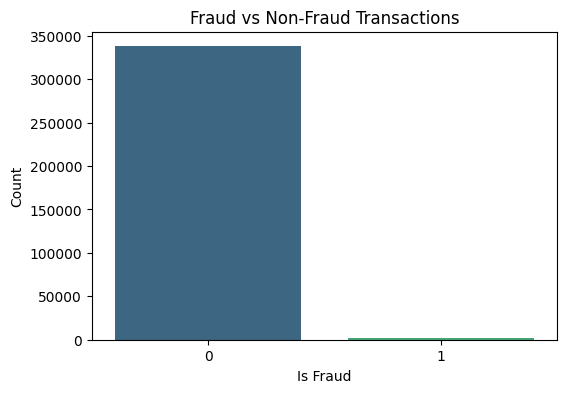

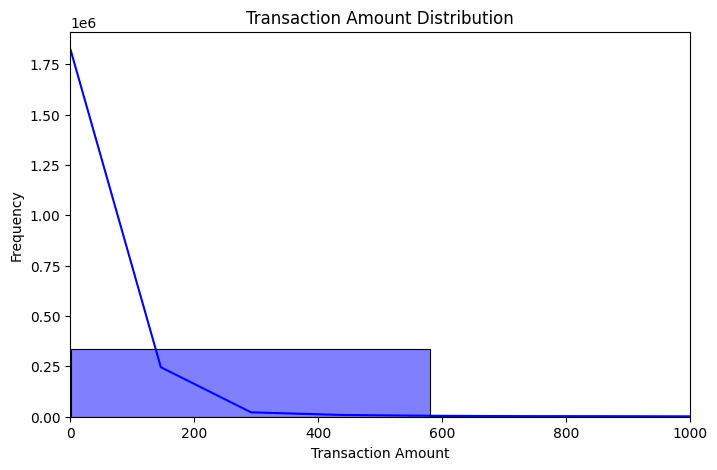

<ipython-input-3-c2553bc31fc8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='coolwarm')


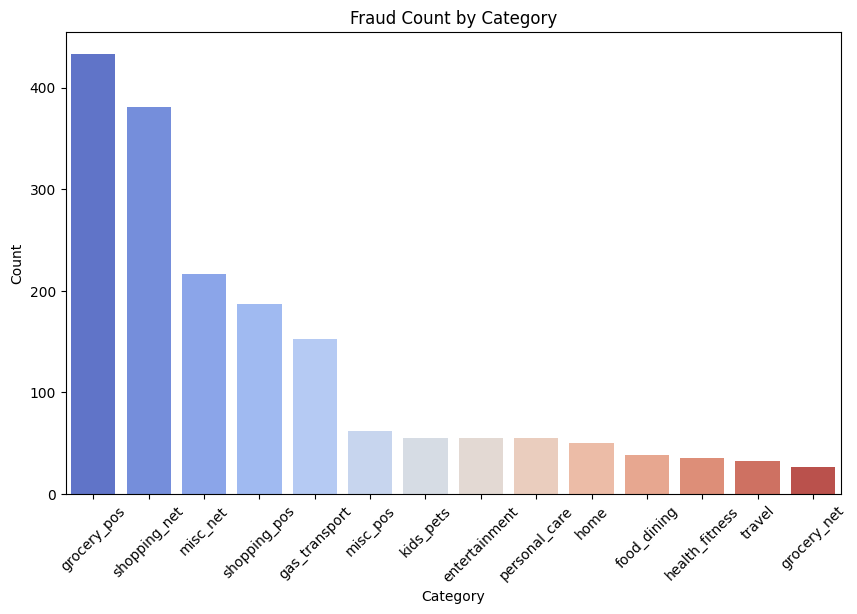

<ipython-input-3-c2553bc31fc8>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values, palette='magma')


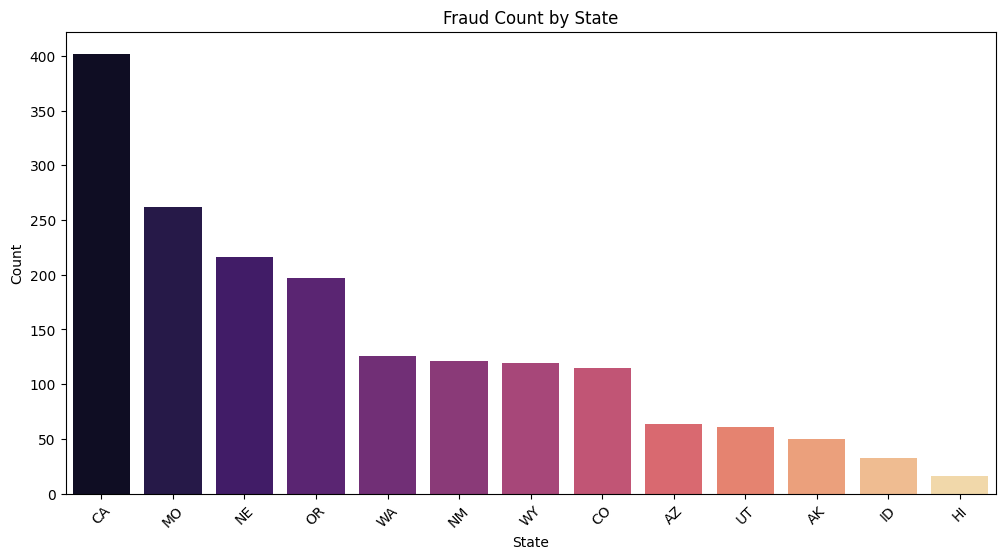

In [3]:
# Visualizing the fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df, palette='viridis')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Visualizing the transaction amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['amt'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting to 1000 for better visualization
plt.show()

# Visualizing fraud by category
plt.figure(figsize=(10, 6))
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts()
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values, palette='coolwarm')
plt.title('Fraud Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualizing fraud by state
plt.figure(figsize=(12, 6))
fraud_by_state = df[df['is_fraud'] == 1]['state'].value_counts()
sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values, palette='magma')
plt.title('Fraud Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

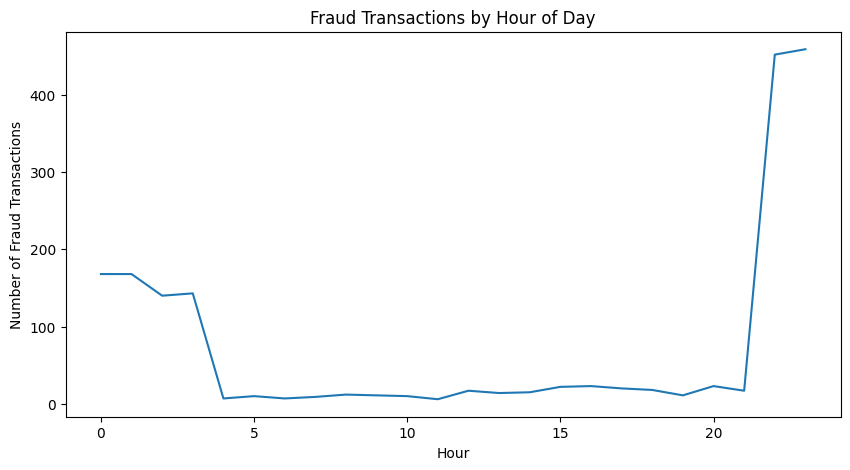

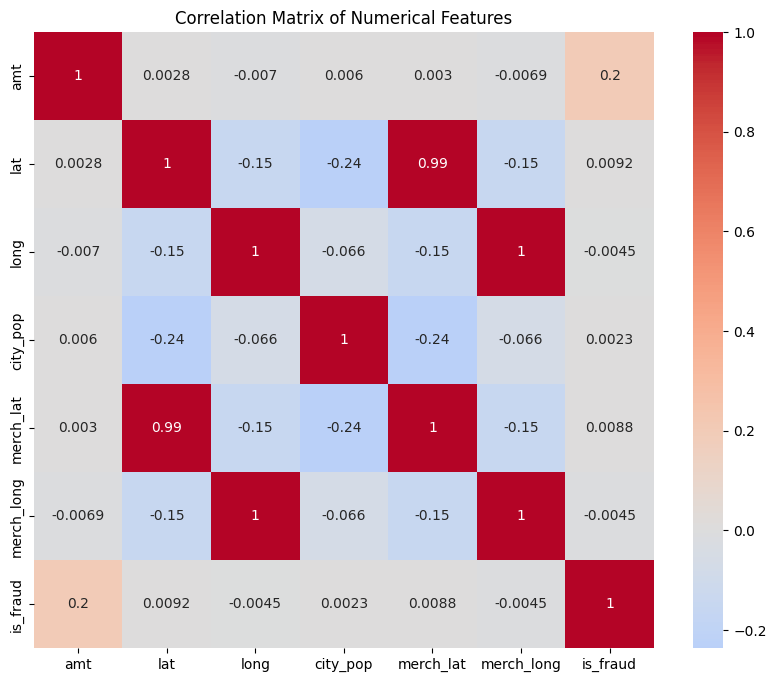

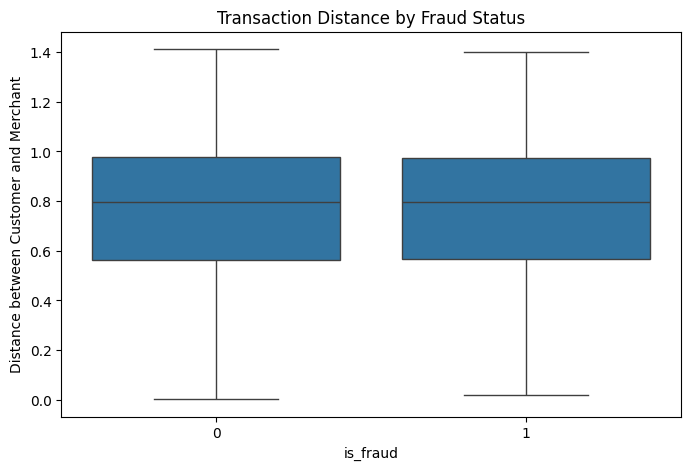

In [4]:
# Convert transaction datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

# Fraud by hour
plt.figure(figsize=(10, 5))
fraud_by_hour = df[df['is_fraud'] == 1]['hour'].value_counts().sort_index()
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.title('Fraud Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Fraud Transactions')
plt.show()

# Create correlation matrix for numerical columns
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Calculate distance between transaction and merchant
df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='distance', data=df)
plt.title('Transaction Distance by Fraud Status')
plt.ylabel('Distance between Customer and Merchant')
plt.show()